In [27]:
import numpy as np
from skimage import io, color, exposure, img_as_float
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem 1

In [28]:
# import the "good.jpeg" image
I = io.imread("/content/drive/MyDrive/BRACU CSE courses/CSE428/Lab 2/Lab Task 2/good.jpeg")

# normalize the image
I_norm = img_as_float(I)

# perform arithmetic operations (contrast increase/decrease) on the image
I_add = I+0.5 # increase by 0.5
I_sub = I-0.4 # decrease by 0.4
I_mul = I*2 # multiply by 2
I_div = I/3 # divide by 3

/tmp/ipython-input-770778047.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_norm)
/tmp/ipython-input-770778047.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_add)
/usr/local/lib/python3.12/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/tmp/ipython-input-770778047.py:13: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_sub)
/tmp/ipython-input-770778047.py:18: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib

Text(0.5, 1.0, 'Division by 3')

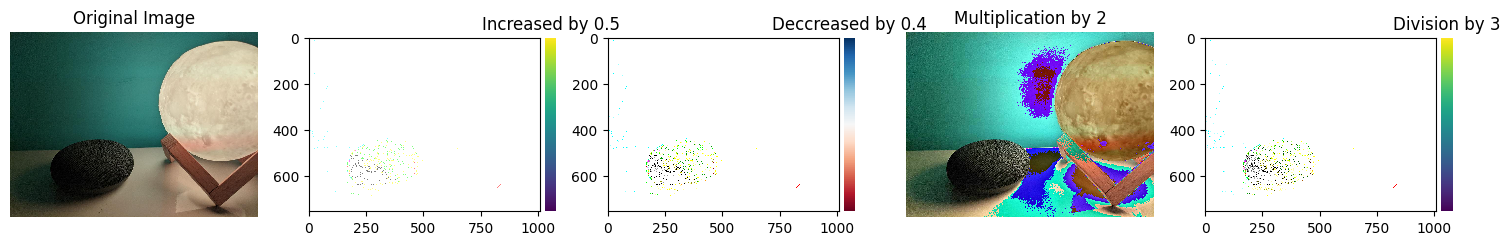

In [29]:
plt.figure(figsize=(15,15))
plt.subplot(1, 5, 1)
io.imshow(I_norm)
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 5, 2)
io.imshow(I_add)
plt.axis("off")
plt.title('Increased by 0.5')

plt.subplot(1,5, 3)
io.imshow(I_sub)
plt.axis("off")
plt.title('Deccreased by 0.4')

plt.subplot(1, 5, 4)
io.imshow(I_mul)
plt.axis("off")
plt.title('Multiplication by 2')

plt.subplot(1, 5, 5)
io.imshow(I_div)
plt.axis("off")
plt.title('Division by 3')

# Problem 2

/tmp/ipython-input-1399708111.py:12: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_norm)


Text(0.5, 1.0, 'Original histogram')

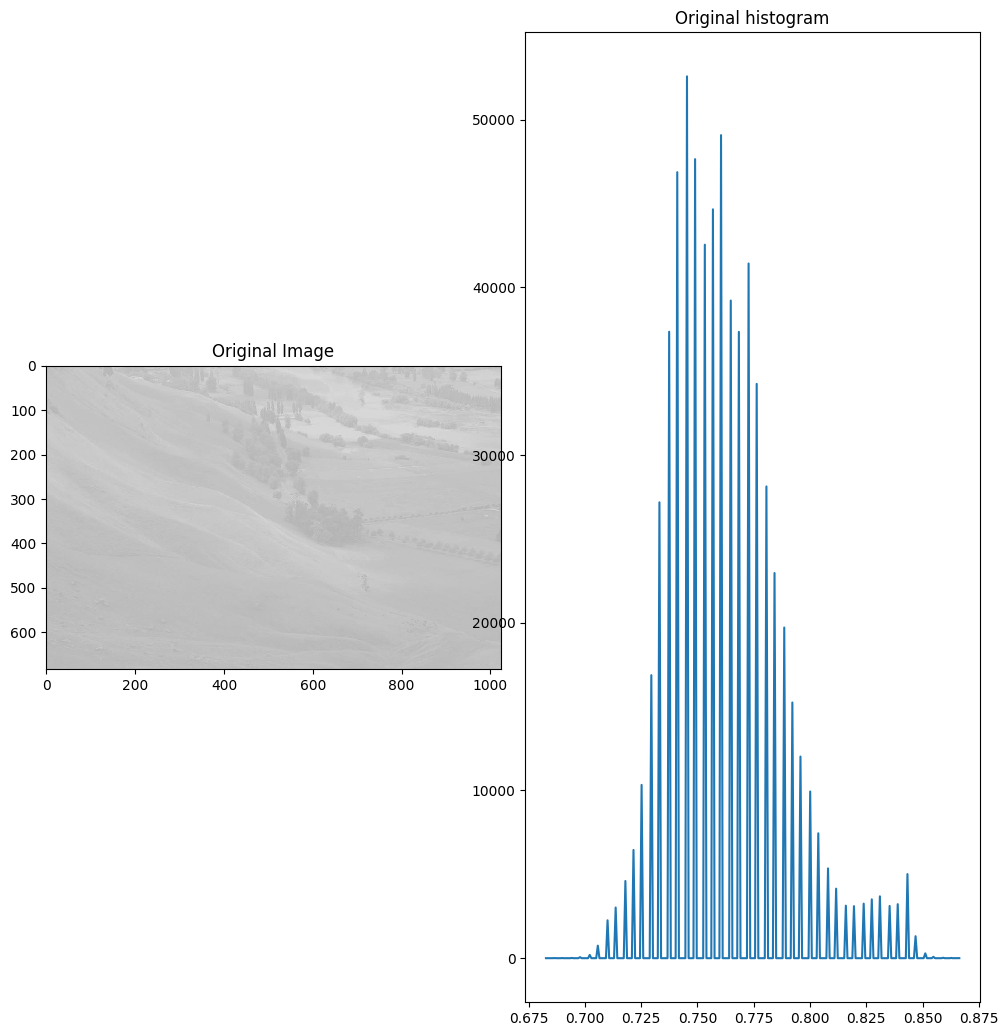

In [32]:
# import the "land.jpeg" image
I = io.imread("/content/drive/MyDrive/BRACU CSE courses/CSE428/Lab 2/Lab Task 2/land.jpeg")

# normalize the image
I_norm = img_as_float(I)

# calculate the histogram (not the PDF) of the original image
hist_org, nbins_org = exposure.histogram(I_norm, nbins=256)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
io.imshow(I_norm)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.plot(nbins_org,hist_org)
plt.title('Original histogram')

/tmp/ipython-input-427942338.py:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_stretched)


Text(0.5, 1.0, 'Stretched  Image')

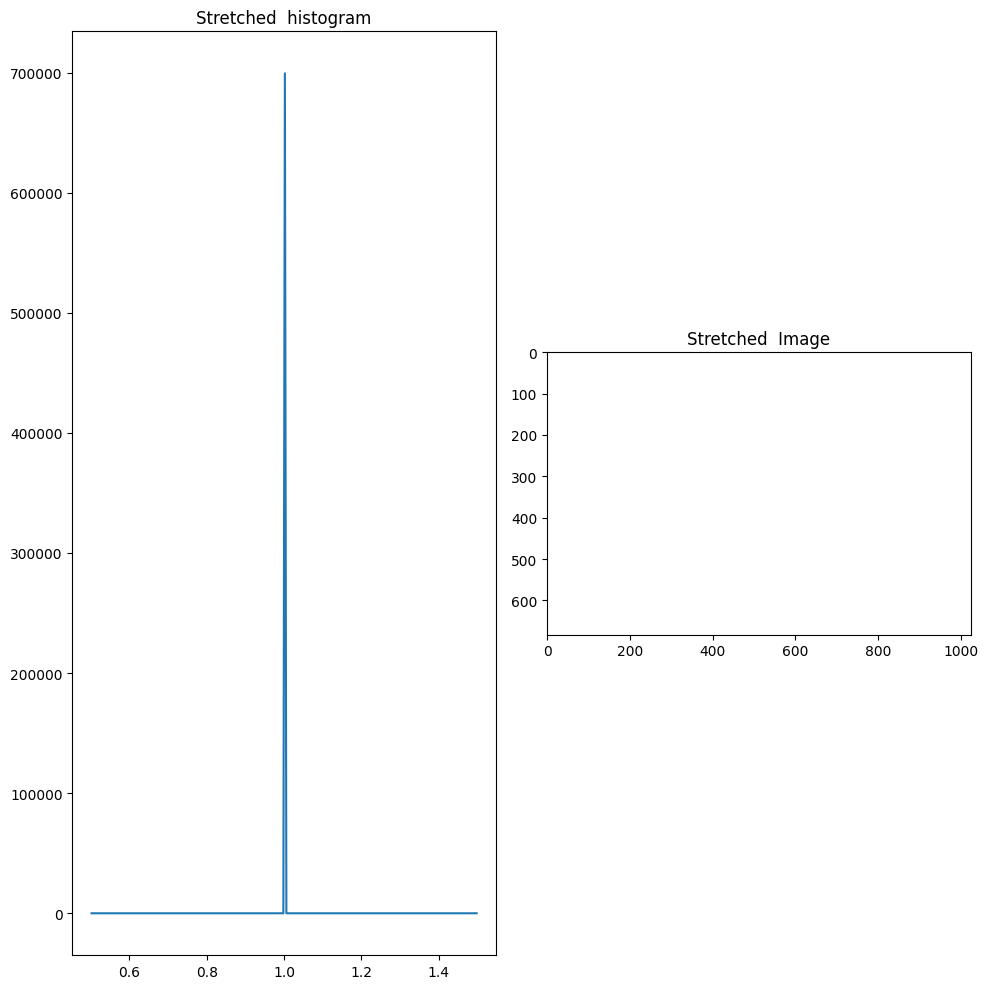

In [31]:
# contrast stretch the image to improve the image quality
I_stretched = np.clip(6*(I-0.7), 0, 1)

# calculate the histogram (not the PDF) of the stretched image
hist_str, nbins_str = exposure.histogram(I_stretched, nbins=256)


plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(nbins_str,hist_str)
plt.title('Stretched  histogram')

plt.subplot(1, 2, 2)
io.imshow(I_stretched)
plt.title('Stretched  Image')

# Problem 3

/tmp/ipython-input-3213539951.py:15: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)
/tmp/ipython-input-3213539951.py:30: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_histeq)


Text(0.5, 1.0, 'Cumulative histogram')

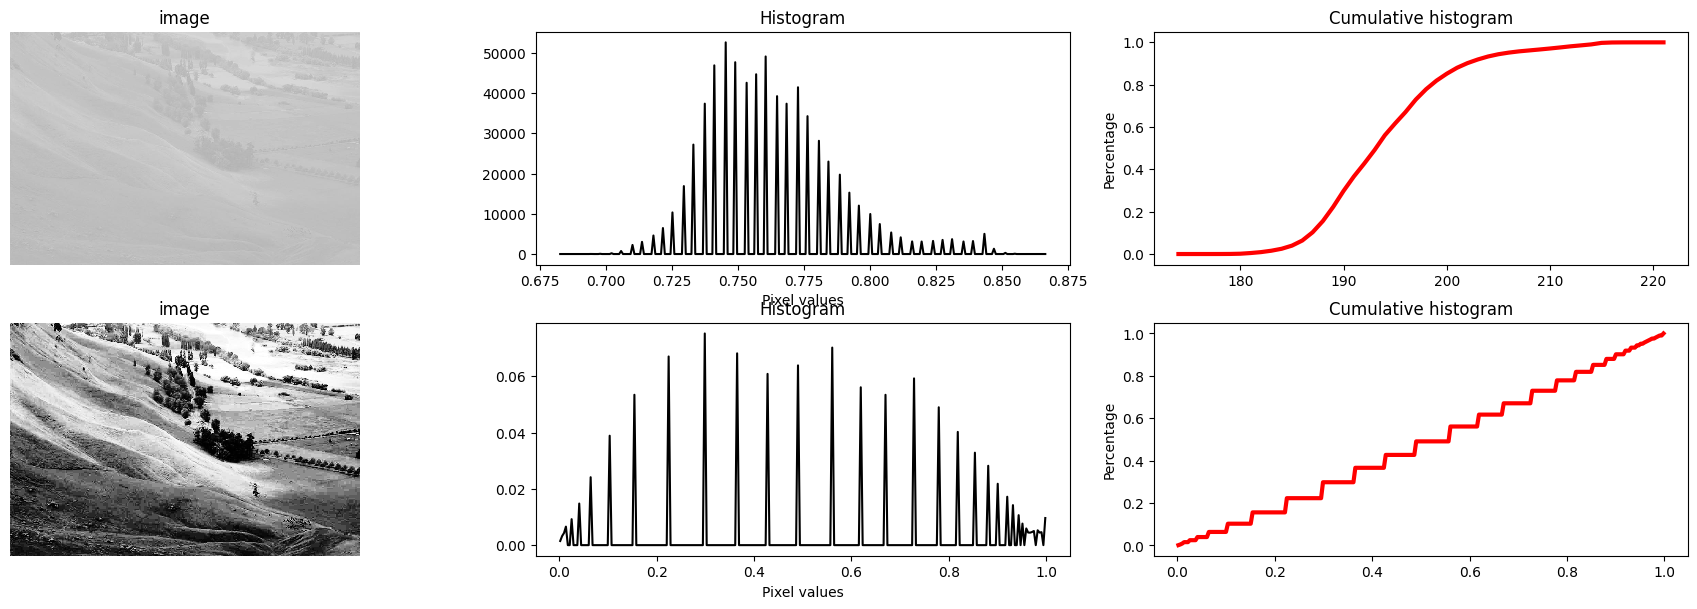

In [38]:
# for the "land.jpeg" image calculate the CDF
chist, cbins = exposure.cumulative_distribution(I, nbins=256)

# perform global histogram equalization on the image
I_histeq = exposure.equalize_hist(I)

# calculate the histogram of the equalized image
hist_I_histeq, bins_I_histeq = exposure.histogram(I_histeq, nbins=256, normalize=True)

# calculate the CDF of the equalized image
chist_I_histeq, cbins_I_histeq = exposure.cumulative_distribution(I_histeq, nbins=256)

plt.rcParams['figure.figsize'] = (18,6)
plt.subplot(2, 3, 1)
io.imshow(I)
plt.axis("off")
plt.title("image")

plt.subplot(2, 3, 2)
plt.plot(nbins_org, hist_org, 'k')
plt.xlabel("Pixel values")
plt.title("Histogram")

plt.subplot(2, 3, 3)
plt.plot(cbins, chist, 'r', lw=3)
plt.ylabel("Percentage")
plt.title("Cumulative histogram")

plt.subplot(2, 3, 4)
io.imshow(I_histeq)
plt.axis("off")
plt.title("image")

plt.subplot(2, 3, 5)
plt.plot(bins_I_histeq, hist_I_histeq, 'k')
plt.xlabel("Pixel values")
plt.title("Histogram")

plt.subplot(2, 3, 6)
plt.plot(cbins_I_histeq, chist_I_histeq, 'r', lw=3)
plt.ylabel("Percentage")
plt.title("Cumulative histogram")